# implementation of SGD in Pytorch

## import libraries

In [ ]:
import torch
import matplotlib.pyplot as plt

from random import randint

%matplotlib inline

## f

In [ ]:
def model(X, w):
  return X @ w

weights with gradient

In [ ]:
N = 2
w = torch.FloatTensor(N).uniform_(-1e-5, 1e-5)
w.requires_grad_(True)
x = torch.arange(0, 3, 0.1)
w

tensor([5.8498e-06, 1.9684e-06], requires_grad=True)

function values at point x

In [ ]:
y_train = 0.5*x + 0.2*torch.sin(2*x) - 0.3

x_train = torch.tensor([[_x**n for n in range(N)]
                        for _x in x ])

In [ ]:
total = len(x) # training sample size
lr = torch.tensor([0.1, 0.01]) # 0.1 - w0,  0.01 - w1

#loss_f = torch.nn.MSELoss()

In [ ]:
for _ in range(1000):
  k = randint(0, total-1)
  y = model(x_train[k], w)

  #loss = loss_f(y, y_train[k])
  loss = (y- y_train[k]) ** 2
  loss.backward()

  w.data = w.data - lr * w.grad
  w.grad.zero_()

## Results

tensor([-0.1093,  0.3744], requires_grad=True)


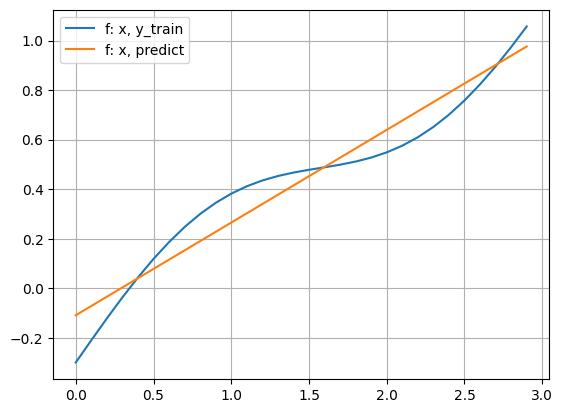

In [ ]:
print(w)
predict = model(x_train, w)

plt.plot(x, y_train)
plt.plot(x, predict.data.numpy())
plt.legend(['f: x, y_train', 'f: x, predict'])
plt.grid()
plt.show()

## optim

In [ ]:
N = 2
w = torch.FloatTensor(N).uniform_(-1e-5, 1e-5)
w.requires_grad_(True)
x = torch.arange(0, 3, 0.1)
w

tensor([7.8357e-06, 9.0704e-06], requires_grad=True)

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(params=[w], lr=0.01, momentum=0.8, nesterov=True)
#optimizer = optim.Adam(params=[w], lr=0.01)
loss_f = torch.nn.MSELoss()

In [ ]:
for _ in range(1000):
  k = randint(0, total-1)
  y = model(x_train[k], w)

  loss = loss_f(y, y_train[k])
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

## results optim

tensor([-0.0979,  0.3620], requires_grad=True)


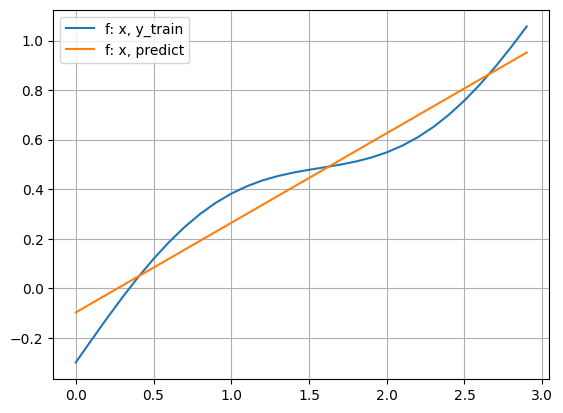

In [ ]:
#SGD
print(w)
predict = model(x_train, w)

plt.plot(x, y_train)
plt.plot(x, predict.data.numpy())
plt.legend(['f: x, y_train', 'f: x, predict'])
plt.grid()
plt.show()

tensor([-0.1197,  0.3482], requires_grad=True)


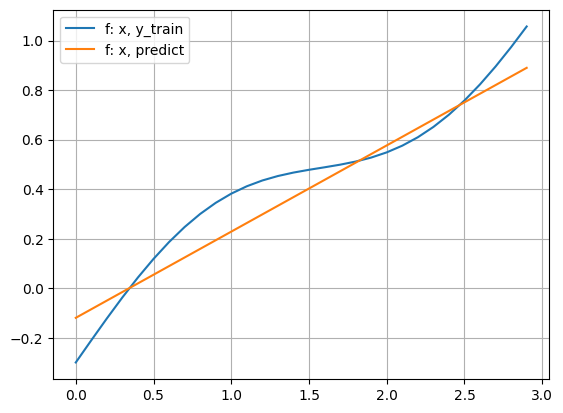

In [ ]:
#adam
print(w)
predict = model(x_train, w)

plt.plot(x, y_train)
plt.plot(x, predict.data.numpy())
plt.legend(['f: x, y_train', 'f: x, predict'])
plt.grid()
plt.show()